<a href="https://colab.research.google.com/github/abhay0908/30-seconds-of-code/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# EfficientNet



In [ ]:
# family of convolutional neural network models for image classification.
!pip install efficientnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
%ls /content/gdrive/MyDrive/final_project/


misc/  resized/  test/  train/  validation/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip install opencv-python


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from efficientnet.tfkeras import EfficientNetB0

# Set the input image size and number of classes
IMG_SIZE = 224
NUM_CLASSES = 5

# Define the data generators for loading images
train_data_generator = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

validation_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory('/content/gdrive/MyDrive/final_project/train',
                                                            target_size=(IMG_SIZE, IMG_SIZE),
                                                            batch_size=32,
                                                            class_mode='categorical')

validation_generator = validation_data_generator.flow_from_directory('/content/gdrive/MyDrive/final_project/validation',
                                                                      target_size=(IMG_SIZE, IMG_SIZE),
                                                                      batch_size=32,
                                                                      class_mode='categorical')

# Define the model architecture
model = Sequential()

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=7, validation_data=validation_generator)


Found 540 images belonging to 5 classes.
Found 540 images belonging to 5 classes.
16804768/16804768 [==============================] - 0s 0us/step


Epoch 1/7
17/17 [==============================] - 340s 19s/step - loss: 1.5829 - accuracy: 0.3093 - val_loss: 1.9154 - val_accuracy: 0.2037
Epoch 2/7
17/17 [==============================] - 192s 11s/step - loss: 1.3077 - accuracy: 0.4796 - val_loss: 2.2905 - val_accuracy: 0.1722
Epoch 3/7
17/17 [==============================] - 187s 11s/step - loss: 1.0491 - accuracy: 0.5722 - val_loss: 2.7564 - val_accuracy: 0.1093
Epoch 4/7
17/17 [==============================] - 192s 11s/step - loss: 0.8922 - accuracy: 0.6759 - val_loss: 3.6790 - val_accuracy: 0.1759
Epoch 5/7
17/17 [==============================] - 187s 11s/step - loss: 0.7585 - accuracy: 0.7056 - val_loss: 3.7465 - val_accuracy: 0.1204
Epoch 6/7
17/17 [==============================] - 189s 11s/step - loss: 0.5991 - accuracy: 0.7741 - val_loss: 3.6603 - val_accuracy: 0.0796
Epoch 7/7
17/17 [==============================] - 189s 11s/step - loss: 0.5982 - accuracy: 0.7815 - val_loss: 4.0011 - val_accuracy: 0.1130


In [ ]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

In [ ]:
model.save('efficientnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!mkdir -p /content/drive/MyDrive/retnotrain

In [ ]:
model.save('efficientnet_model.h5')

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from efficientnet.tfkeras import EfficientNetB0

# Set the input image size and number of classes
IMG_SIZE = 224
NUM_CLASSES = 5

# Define the data generators for loading images
train_data_generator = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

validation_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory('/content/gdrive/MyDrive/final_project/train',
                                                            target_size=(IMG_SIZE, IMG_SIZE),
                                                            batch_size=32,
                                                            class_mode='categorical')

validation_generator = validation_data_generator.flow_from_directory('/content/gdrive/MyDrive/final_project/validation',
                                                                      target_size=(IMG_SIZE, IMG_SIZE),
                                                                      batch_size=32,
                                                                      class_mode='categorical')

# Define the model architecture
model = Sequential()

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=7, validation_data=validation_generator)


Found 540 images belonging to 5 classes.
Found 540 images belonging to 5 classes.
Epoch 1/7
17/17 [==============================] - 225s 11s/step - loss: 1.5754 - accuracy: 0.3315 - val_loss: 1.8790 - val_accuracy: 0.1574
Epoch 2/7
17/17 [==============================] - 190s 11s/step - loss: 1.3374 - accuracy: 0.4315 - val_loss: 3.3938 - val_accuracy: 0.1093
Epoch 3/7
17/17 [==============================] - 196s 12s/step - loss: 1.1653 - accuracy: 0.5333 - val_loss: 4.5113 - val_accuracy: 0.1056
Epoch 4/7
17/17 [==============================] - 181s 11s/step - loss: 1.0220 - accuracy: 0.5981 - val_loss: 3.8044 - val_accuracy: 0.1000
Epoch 5/7
17/17 [==============================] - 185s 11s/step - loss: 0.8863 - accuracy: 0.6537 - val_loss: 2.9928 - val_accuracy: 0.1111
Epoch 6/7
17/17 [==============================] - 197s 12s/step - loss: 0.7118 - accuracy: 0.7167 - val_loss: 3.2965 - val_accuracy: 0.0889
Epoch 7/7
17/17 [==============================] - 203s 12s/step - loss:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np

# Set the input image size and number of classes
IMG_SIZE = 224
NUM_CLASSES = 5

# Load the EfficientNet model
#model = tf.keras.models.load_model('efficientnet_model.h5')


model = keras.models.load_model('efficientnet_model.h5')


# Load an image to be classified
img_path = '/content/gdrive/MyDrive/process/process1.png'
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
class_idx = np.argmax(predictions[0])
class_names = ['No Diabetes Retinopathy', 'Mild', 'Moderate', 'Severe', 'Proliferative Diabetic Retinopathy']
if class_idx >= len(class_names):
    class_idx = len(class_names) - 1


class_name = class_names[class_idx]

print('Predicted class:', class_name)


1/1 [==============================] - 3s 3s/step
Predicted class: Moderate


In [ ]:
%ls /content/gdrive/MyDrive/final_project/

misc/  resized/  test/  train/  validation/


Model loaded successfully.
1/1 [==============================] - 0s 140ms/step
Results saved to results.csv


<ipython-input-23-b7eedaa2cd5e>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted Class', data=predictions_df, palette='viridis')


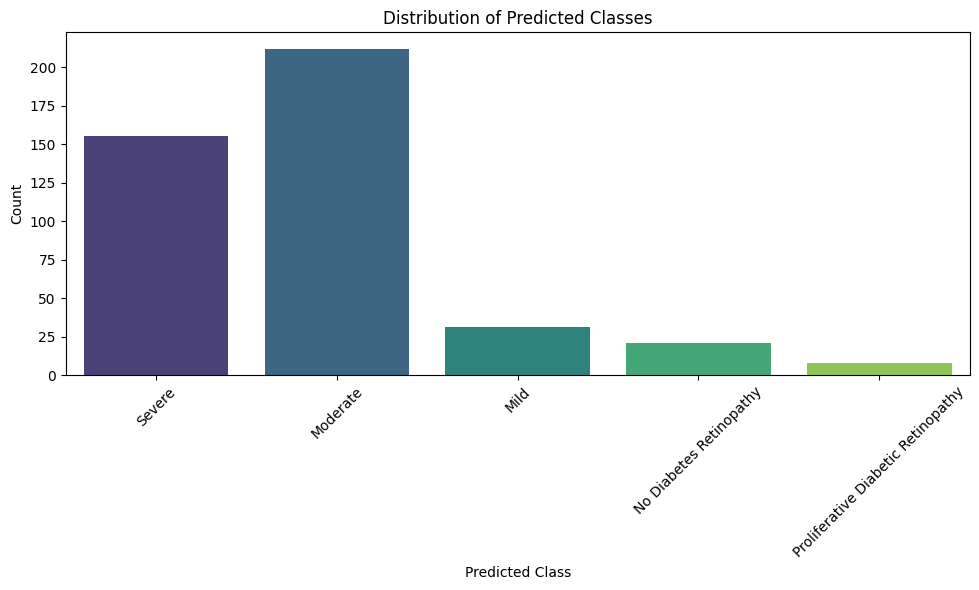

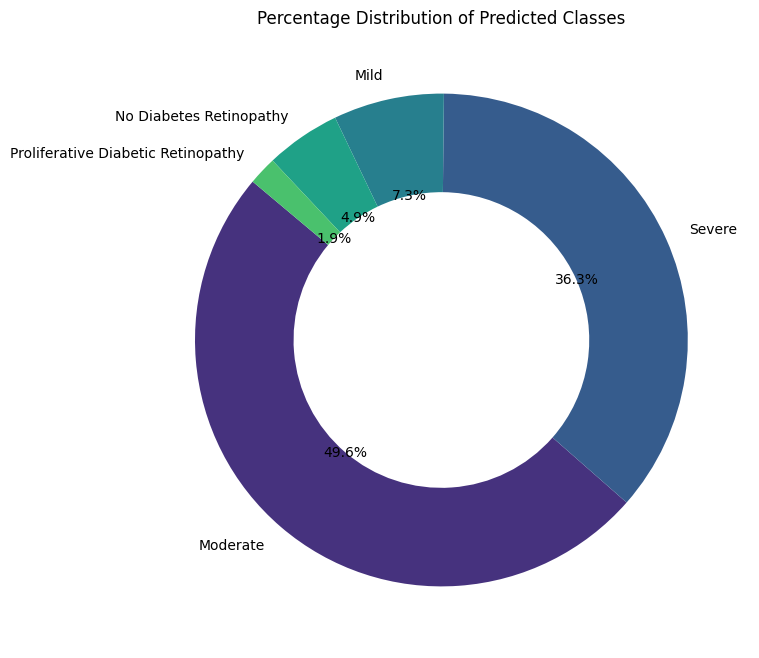

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from google.colab import files




# Get the current working directory
current_directory = os.getcwd()

# Provide the full path to your model file
model_path = os.path.join(current_directory, 'efficientnet_model.h5')

# Check if the file exists
if os.path.exists(model_path):
    # Load the model
    model = load_model(model_path)
    print("Model loaded successfully.")
else:
    print(f"Model file not found at: {model_path}")

# Directory containing your test images
test_images_dir = '/content/gdrive/MyDrive/retnopathy'
# test_images_dir = '/content/gdrive/MyDrive/final_project/validation/class1'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpg')]

# Initialize a list to store the results
results = []

# Loop over each image
for img_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(test_images_dir, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    class_names = ['No Diabetes Retinopathy', 'Mild', 'Moderate', 'Severe', 'Proliferative Diabetic Retinopathy']

    if class_idx >= len(class_names):
        class_idx = len(class_names) - 1

    class_name = class_names[class_idx]

    # Append the result to the list
    results.append({'Image': img_file, 'Predicted Class': class_name})

# Save results to CSV
csv_file = 'results.csv'
fields = ['Image', 'Predicted Class']

with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.DictWriter(csvfile, fieldnames=fields)

    # Write the header
    csv_writer.writeheader()

    # Write the results
    csv_writer.writerows(results)

print(f'Results saved to {csv_file}')

# Load results from CSV
predictions_df = pd.read_csv(csv_file)

# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted Class', data=predictions_df, palette='viridis')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/bar_chart.png')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
predictions_count = predictions_df['Predicted Class'].value_counts()
plt.pie(predictions_count, labels=predictions_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.4))
plt.title('Percentage Distribution of Predicted Classes')
plt.savefig('/content/pie_chart.png')
plt.show()

# Download the CSV file
files.download('results.csv')



In [ ]:
import os
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from google.colab import files




# Get the current working directory
current_directory = os.getcwd()

# Provide the full path to your model file
model_path = os.path.join(current_directory, 'efficientnet_model.h5')

# Check if the file exists
if os.path.exists(model_path):
    # Load the model
    model = load_model(model_path)
    print("Model loaded successfully.")
else:
    print(f"Model file not found at: {model_path}")

# Directory containing your test images
# test_images_dir = '/content/gdrive/MyDrive/retnopathy'
test_images_dir = '/content/gdrive/MyDrive/final_project/validation/class2'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpeg')]

# Initialize a list to store the results
results = []

# Loop over each image
for img_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(test_images_dir, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    class_names = ['No Diabetes Retinopathy', 'Mild', 'Moderate', 'Severe', 'Proliferative Diabetic Retinopathy']

    if class_idx >= len(class_names):
        class_idx = len(class_names) - 1

    class_name = class_names[class_idx]

    # Append the result to the list
    results.append({'Image': img_file, 'Predicted Class': class_name})

# Save results to CSV
csv_file = 'results.csv'
fields = ['Image', 'Predicted Class']

with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.DictWriter(csvfile, fieldnames=fields)

    # Write the header
    csv_writer.writeheader()

    # Write the results
    csv_writer.writerows(results)

print(f'Results saved to {csv_file}')

# Load results from CSV
predictions_df = pd.read_csv(csv_file)

# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted Class', data=predictions_df, palette='viridis')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/bar_chart.png')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
predictions_count = predictions_df['Predicted Class'].value_counts()
plt.pie(predictions_count, labels=predictions_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.4))
plt.title('Percentage Distribution of Predicted Classes')
plt.savefig('/content/pie_chart.png')
plt.show()

# Download the CSV file
files.download('results.csv')



Model loaded successfully.
1/1 [==============================] - 0s 88ms/step
Results saved to results.csv


<ipython-input-16-18edb8cc83da>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted Class', data=predictions_df, palette='viridis')


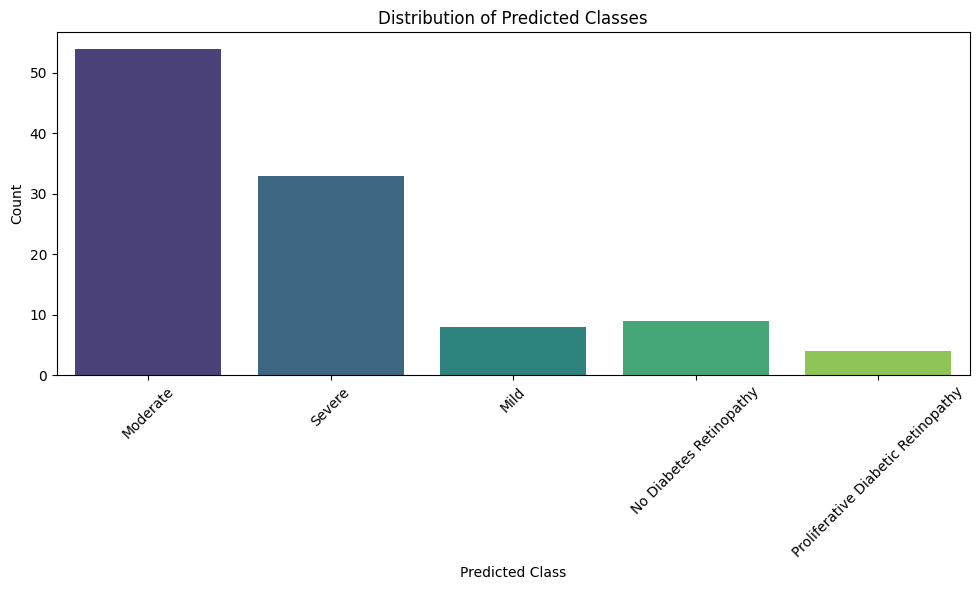

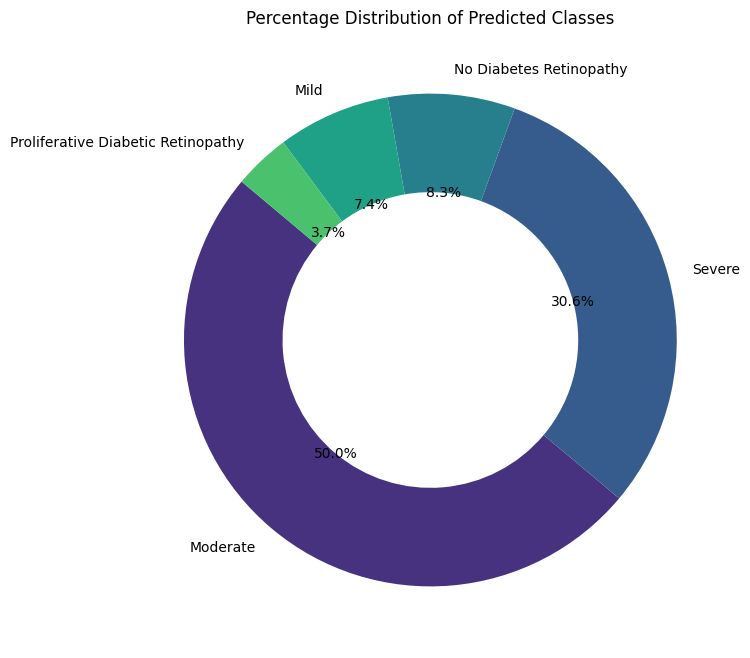

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from google.colab import files




# Get the current working directory
current_directory = os.getcwd()

# Provide the full path to your model file
model_path = os.path.join(current_directory, 'efficientnet_model.h5')

# Check if the file exists
if os.path.exists(model_path):
    # Load the model
    model = load_model(model_path)
    print("Model loaded successfully.")
else:
    print(f"Model file not found at: {model_path}")

# Directory containing your test images
# test_images_dir = '/content/gdrive/MyDrive/retnopathy'
test_images_dir = '/content/gdrive/MyDrive/final_project/validation/class3'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpeg')]

# Initialize a list to store the results
results = []

# Loop over each image
for img_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(test_images_dir, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    class_names = ['No Diabetes Retinopathy', 'Mild', 'Moderate', 'Severe', 'Proliferative Diabetic Retinopathy']

    if class_idx >= len(class_names):
        class_idx = len(class_names) - 1

    class_name = class_names[class_idx]

    # Append the result to the list
    results.append({'Image': img_file, 'Predicted Class': class_name})

# Save results to CSV
csv_file = 'results.csv'
fields = ['Image', 'Predicted Class']

with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.DictWriter(csvfile, fieldnames=fields)

    # Write the header
    csv_writer.writeheader()

    # Write the results
    csv_writer.writerows(results)

print(f'Results saved to {csv_file}')

# Load results from CSV
predictions_df = pd.read_csv(csv_file)

# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted Class', data=predictions_df, palette='viridis')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/bar_chart.png')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
predictions_count = predictions_df['Predicted Class'].value_counts()
plt.pie(predictions_count, labels=predictions_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.4))
plt.title('Percentage Distribution of Predicted Classes')
plt.savefig('/content/pie_chart.png')
plt.show()

# Download the CSV file
files.download('results.csv')



In [ ]:
import os
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from google.colab import files




# Get the current working directory
current_directory = os.getcwd()

# Provide the full path to your model file
model_path = os.path.join(current_directory, 'efficientnet_model.h5')

# Check if the file exists
if os.path.exists(model_path):
    # Load the model
    model = load_model(model_path)
    print("Model loaded successfully.")
else:
    print(f"Model file not found at: {model_path}")

# Directory containing your test images
# test_images_dir = '/content/gdrive/MyDrive/retnopathy'
test_images_dir = '/content/gdrive/MyDrive/final_project/validation/class4'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpeg')]

# Initialize a list to store the results
results = []

# Loop over each image
for img_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(test_images_dir, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    class_names = ['No Diabetes Retinopathy', 'Mild', 'Moderate', 'Severe', 'Proliferative Diabetic Retinopathy']

    if class_idx >= len(class_names):
        class_idx = len(class_names) - 1

    class_name = class_names[class_idx]

    # Append the result to the list
    results.append({'Image': img_file, 'Predicted Class': class_name})

# Save results to CSV
csv_file = 'results.csv'
fields = ['Image', 'Predicted Class']

with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.DictWriter(csvfile, fieldnames=fields)

    # Write the header
    csv_writer.writeheader()

    # Write the results
    csv_writer.writerows(results)

print(f'Results saved to {csv_file}')

# Load results from CSV
predictions_df = pd.read_csv(csv_file)

# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted Class', data=predictions_df, palette='viridis')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/bar_chart.png')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
predictions_count = predictions_df['Predicted Class'].value_counts()
plt.pie(predictions_count, labels=predictions_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.4))
plt.title('Percentage Distribution of Predicted Classes')
plt.savefig('/content/pie_chart.png')
plt.show()

# Download the CSV file
files.download('results.csv')



In [ ]:
import os
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from google.colab import files




# Get the current working directory
current_directory = os.getcwd()

# Provide the full path to your model file
model_path = os.path.join(current_directory, 'efficientnet_model.h5')

# Check if the file exists
if os.path.exists(model_path):
    # Load the model
    model = load_model(model_path)
    print("Model loaded successfully.")
else:
    print(f"Model file not found at: {model_path}")

# Directory containing your test images
# test_images_dir = '/content/gdrive/MyDrive/retnopathy'
test_images_dir = '/content/gdrive/MyDrive/final_project/validation/class5'

# Get a list of image files in the directory
image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpeg')]

# Initialize a list to store the results
results = []

# Loop over each image
for img_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(test_images_dir, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    class_names = ['No Diabetes Retinopathy', 'Mild', 'Moderate', 'Severe', 'Proliferative Diabetic Retinopathy']

    if class_idx >= len(class_names):
        class_idx = len(class_names) - 1

    class_name = class_names[class_idx]

    # Append the result to the list
    results.append({'Image': img_file, 'Predicted Class': class_name})

# Save results to CSV
csv_file = 'results.csv'
fields = ['Image', 'Predicted Class']

with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.DictWriter(csvfile, fieldnames=fields)

    # Write the header
    csv_writer.writeheader()

    # Write the results
    csv_writer.writerows(results)

print(f'Results saved to {csv_file}')

# Load results from CSV
predictions_df = pd.read_csv(csv_file)

# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted Class', data=predictions_df, palette='viridis')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/bar_chart.png')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
predictions_count = predictions_df['Predicted Class'].value_counts()
plt.pie(predictions_count, labels=predictions_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.4))
plt.title('Percentage Distribution of Predicted Classes')
plt.savefig('/content/pie_chart.png')
plt.show()

# Download the CSV file
files.download('results.csv')



In [ ]:
from tensorflow.keras.preprocessing import image


In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input

# Load pre-trained EfficientNetB0 model
model = EfficientNetB0(weights='imagenet')

# Load an image to be classified
img_path = '/content/gdrive/MyDrive/retnopathy/train.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

# Preprocess the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make prediction
pred = model.predict(x)

# Print predicted class probabilities
print(pred)

# Get the index of the predicted class
predicted_class_index = np.argmax(pred[0])

# Print predicted class index and label
print("Predicted class index: ", predicted_class_index)
if predicted_class_index == 0:
    print('Class 1')
else:
    print('Class 2')




1/1 [==============================] - 2s 2s/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.47889509e-38 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.05905963e-27 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.87276377e-30 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.0